In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import shap
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
warnings.filterwarnings("ignore")

C:\Users\latjk\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
df = pd.read_csv("data.csv")
df.head()

,crime rate,% residential zone,% industrial zone,Charles River,NOX concentration,number of rooms,% built before 1940,remoteness,connectedness,tax rate,pupil-teacher ratio,% working class,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,9.96,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,18.28,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,8.06,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,5.88,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,10.66,36200.0


In [3]:
df.shape

(506, 13)

In [4]:
# crime rate	Per capita crime rate in the town.
# % residential zone	Percentage of land zoned for residential use.
# % industrial zone	Percentage of land zoned for industrial use.
# Charles River	1 if the house borders the Charles River; 0 otherwise.
# NOX concentration	Nitric oxides concentration (parts per 10 million).
# number of rooms	The average number of rooms per house in the housing unit.
# % built before 1940	The proportion of houses built prior to 1940 in the unit.
# remoteness	A measure of how far the housing is from employment centres (higher is more remote).
# connectedness	A measure of how good the local road connections are (higher is more connected).
# tax rate	Property tax rate per $10,000 of house value.
# pupil-teacher ratio	The pupil:teacher ratio of the town.
# % working class	Percentage of the population that is working class.

In [5]:
df.isnull().sum()

crime rate             0
% residential zone     0
% industrial zone      0
Charles River          0
NOX concentration      0
number of rooms        0
% built before 1940    0
remoteness             0
connectedness          0
tax rate               0
pupil-teacher ratio    0
% working class        0
y                      0
dtype: int64

In [6]:
df.dtypes

crime rate             float64
% residential zone     float64
% industrial zone      float64
Charles River          float64
NOX concentration      float64
number of rooms        float64
% built before 1940    float64
remoteness             float64
connectedness          float64
tax rate               float64
pupil-teacher ratio    float64
% working class        float64
y                      float64
dtype: object

In [7]:
X = df.drop('y', axis=1)  
y = df['y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

model = XGBRegressor(n_estimators=100, max_depth=7, subsample=0.7)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

2765.9617772033516

<Figure size 1000x600 with 0 Axes>

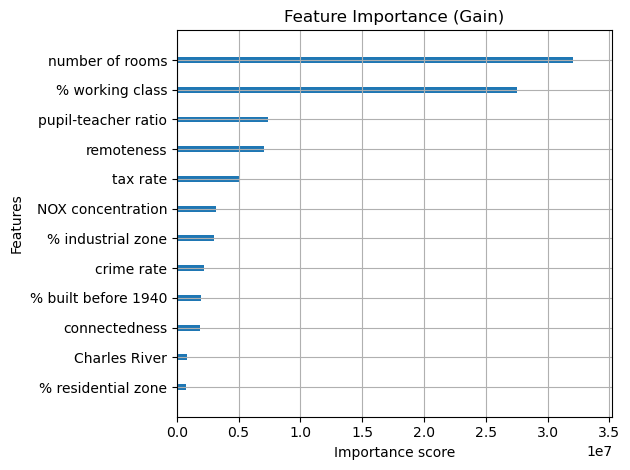

In [12]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', show_values=False)
plt.title('Feature Importance (Gain)')
plt.tight_layout()
plt.show()

## Computing SHAP Values

In [13]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [14]:
shap.initjs()

## Global Explanations

<Axes: xlabel='mean(|SHAP value|)'>

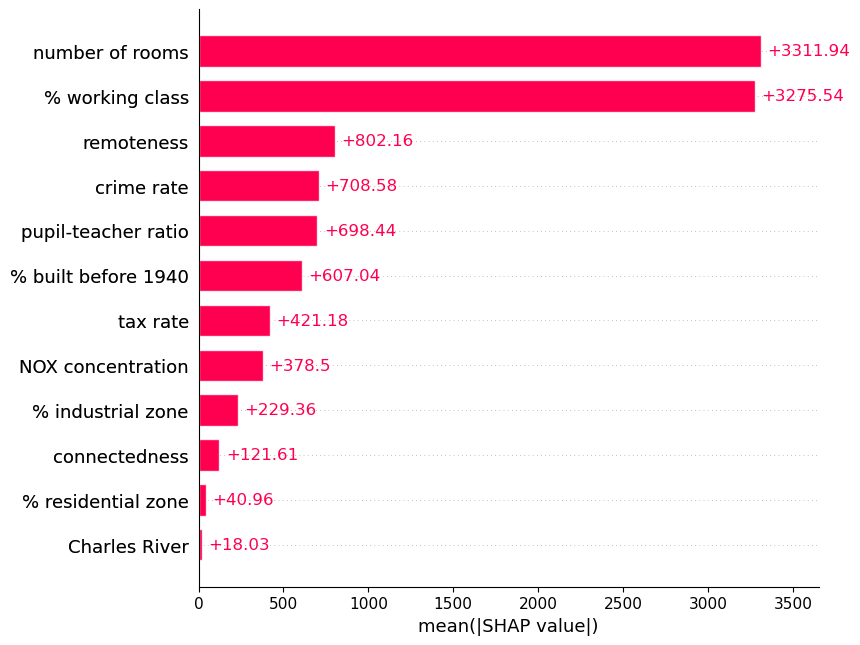

In [15]:
shap.plots.bar(shap_values, max_display=99, show=False)
# plt.gcf()

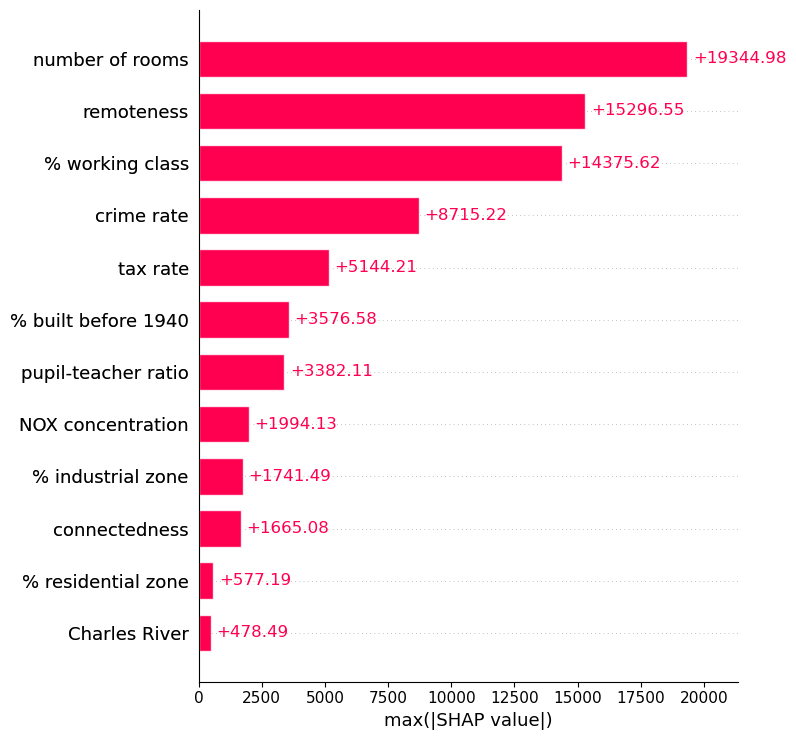

In [16]:
plt.figure(figsize=(10, 6))  
shap.plots.bar(shap_values.abs.max(0), max_display=99, show=False)

plt.tight_layout()

<Axes: xlabel='SHAP value (impact on model output)'>

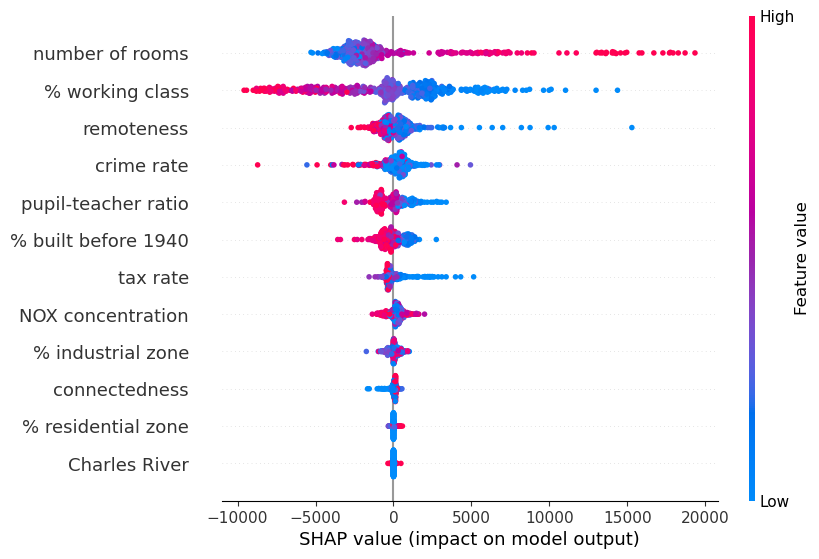

In [17]:
shap.plots.beeswarm(shap_values, max_display=99, show=False)

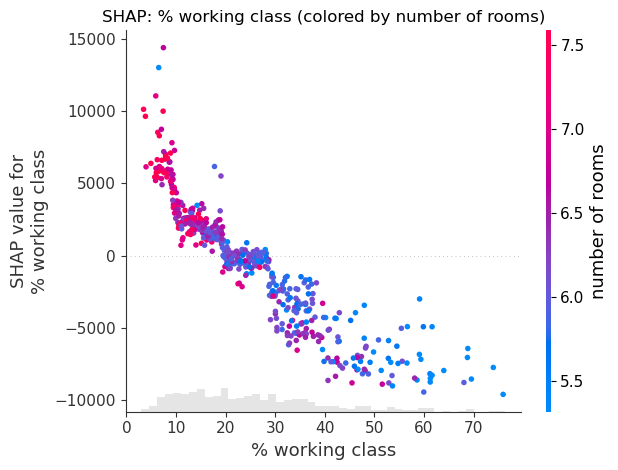

In [18]:
fig, ax = plt.subplots()
shap.plots.scatter(
    shap_values[:, "% working class"], 
    color=shap_values[:, "number of rooms"], 
    ax=ax, 
    show=False
)
ax.set_title('SHAP: % working class (colored by number of rooms)')
plt.tight_layout()
plt.show()

## Local Interpritability

In [19]:
i_med = np.argsort(y_pred)[len(y_pred)//2]
i_max = np.argmax(y_pred)
i_80 = np.argsort(y_pred)[int(len(y_pred)*0.8)]
i_60 = np.argsort(y_pred)[int(len(y_pred)*0.6)]
i_40 = np.argsort(y_pred)[int(len(y_pred)*0.4)]
i_20 = np.argsort(y_pred)[int(len(y_pred)*0.2)]
i_min = np.argmin(y_pred)

In [20]:
y_test

173    23600.0
274    32400.0
491    13600.0
72     22800.0
452    16100.0
        ...   
412    17900.0
436     9600.0
411    17200.0
86     22500.0
75     21400.0
Name: y, Length: 102, dtype: float64

In [21]:
y_pred

array([25673.426 , 35592.85  , 16839.43  , 23585.979 , 15124.792 ,
       23564.48  , 17899.307 , 14132.074 , 21990.99  , 19484.904 ,
       24590.979 , 20797.047 , 10005.847 , 21777.46  , 18398.229 ,
       25775.555 , 20481.244 ,  9090.853 , 46207.977 , 13605.524 ,
       25823.58  , 25341.764 , 13117.5625, 23008.857 , 15536.942 ,
       12471.473 , 21912.123 , 13658.92  , 21719.031 , 21362.53  ,
       20912.578 , 24232.717 , 26388.662 , 20523.32  , 13656.853 ,
       15957.1875, 34274.004 , 18901.105 , 22792.422 , 24563.768 ,
       15516.165 , 31803.885 , 48868.16  , 18955.209 , 23672.875 ,
       13372.4375, 14995.008 , 25062.79  , 18380.17  , 25243.984 ,
       20537.146 , 35688.48  , 17332.838 , 25184.084 , 49553.383 ,
       21738.938 , 16489.443 , 32470.85  , 22978.514 , 19429.889 ,
       24489.988 , 36230.676 , 32535.086 , 18417.457 , 23411.69  ,
       17858.443 , 12609.876 , 23994.408 , 28668.621 , 16246.963 ,
       19926.398 , 22942.363 ,  9959.825 , 20495.865 , 24453.3

In [22]:
X_test

,crime rate,% residential zone,% industrial zone,Charles River,NOX concentration,number of rooms,% built before 1940,remoteness,connectedness,tax rate,pupil-teacher ratio,% working class
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,18.08
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,7.06
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,36.14
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,11.04
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,34.54
...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,68.74
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,36.10
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,42.44
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,25.72


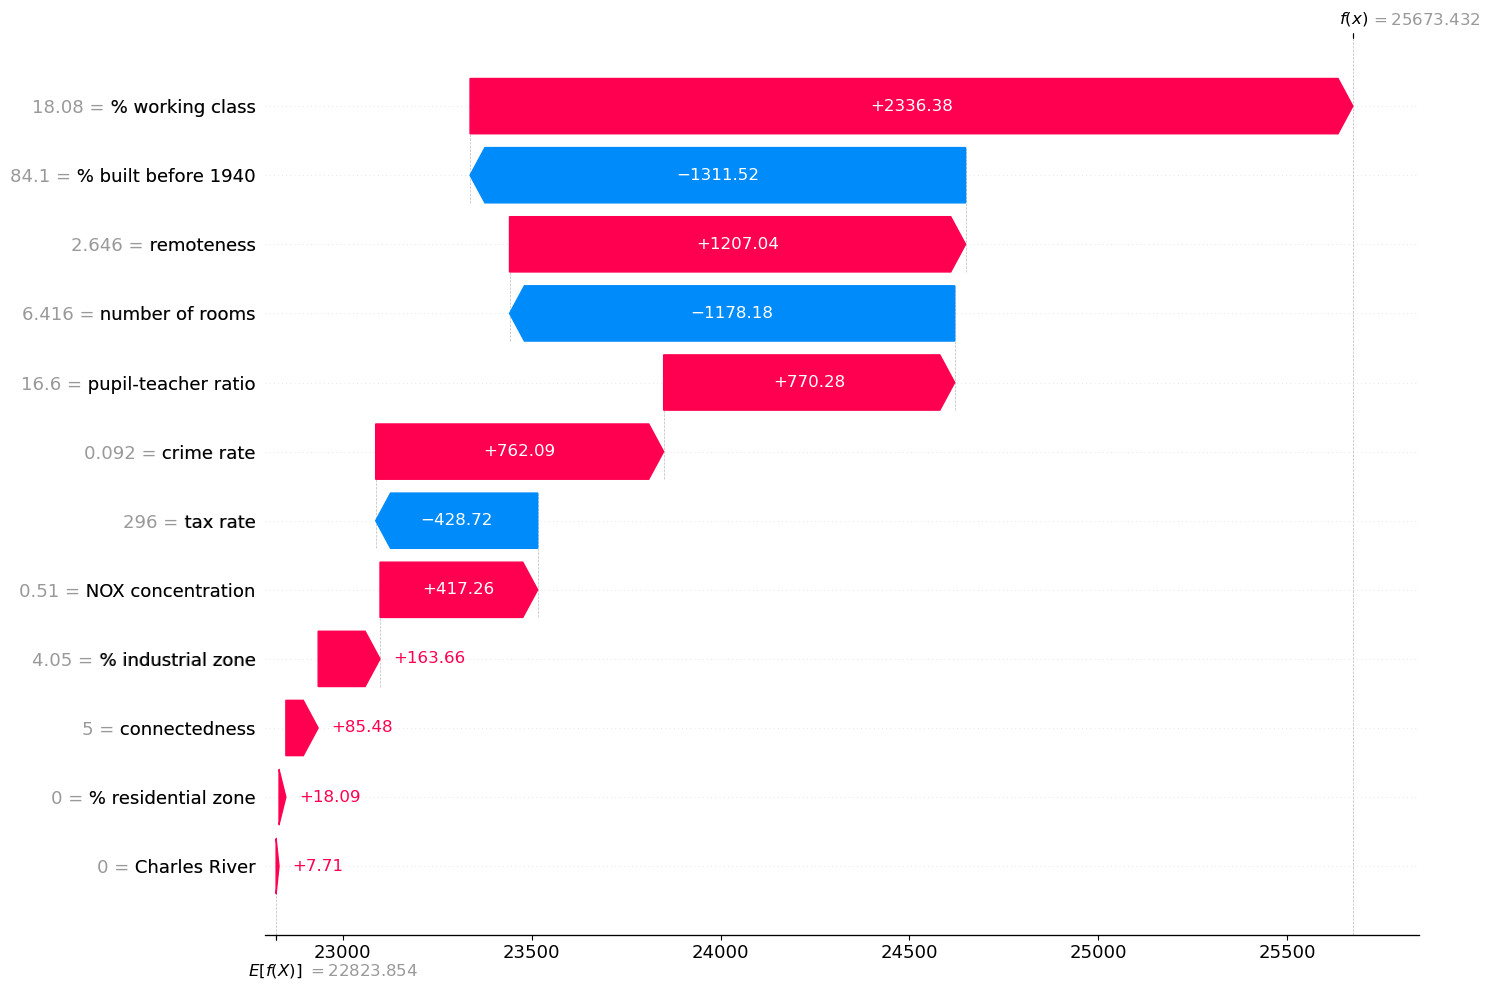

In [23]:
shap.plots.waterfall(shap_values[173], max_display=99, show=False)
plt.gcf().set_size_inches(15, 10)
plt.tight_layout()
plt.show()

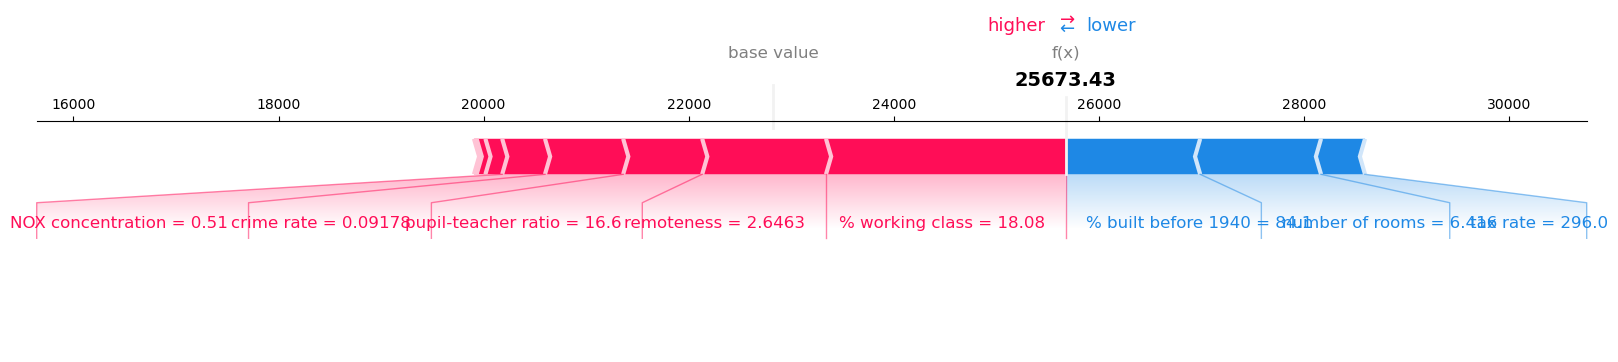

In [24]:
shap.plots.force(shap_values[173], show=False, matplotlib=True)
plt.gcf()